# NLP on social media data (Part I) : Analysing Data For a Subreddit

In order to start collecting data from Reddit, we need to create a reddit API account and API keys, and import the credentials along with the necessary libraries.

In [6]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
import sqlite3
import credentials

Next, we initialize our reddit connection with our credentials.

In [7]:
reddit = praw.Reddit(client_id=credentials.client_id,
                     client_secret=credentials.client_secret,
                     user_agent=credentials.user_agent)

Next, we select a subreddit of interest. My subreddit of choice is r/sociology. I chose to sort the posts by 'top', and the time frame "all", to get the highest rated and therefore the most interesting posts.

In [8]:
so_subreddit = reddit.subreddit('sociology').top(time_filter='all', limit=None)

Next, to retrieve the post titles, we iterate over each post and print the title and score.

In [9]:
for post in so_subreddit:
    print(post.title, post.score)    

1 out of 5 young people 18-29 now say that the Holocaust is a myth, new Economist/YouGov poll shows 1226
Is there a paedophilia-panic going on in the US? 1150
Burned Out? 776
Are memes ok? (Goffman inspired meme) 764
For the sociologist who love The Office as much as I do, here's a gift - it's my all time favorite meme. 627
High school sociology teacher here. We just finished up a unit on Max Weber. Then I saw this in the cafeteria: 628
Why do people in rural areas tend to be more conservative than urban? 619
couldnt find a rule against posting this 583
Why is sex so complicated? 524
Does anyone else find reddit extremely interesting from a sociological perspective? 517
Is the assertion at the end of this video correct? 500
The Florida State Board of Education downgrades sociology, identified as a topic that could “radicalize” students. 502
If you could create a third place, what would it be like? 478
Cultural obsession with pedophilia online 471
Social disorganization humor 476
My dep

We then save data such as the post title, author, permalink, comments, number of comments, and score, as a dictionary of lists.

In [10]:
reddit_data = {'title': [],
               'link': [],
               'author': [],
               'n_comments': [],
               'score': [],
               'text': [],
               'comments': []}  

so_subreddit = reddit.subreddit('sociology').top(time_filter='all', limit=None)

for post in list(so_subreddit):
    reddit_data['title'].append(post.title)
    reddit_data['link'].append(post.permalink)
    
    if post.author is None:
        reddit_data['author'].append('')
    else:
        reddit_data['author'].append(post.author.name)
    
    reddit_data['n_comments'].append(post.num_comments)
    reddit_data['score'].append(post.score)
    reddit_data['text'].append(post.selftext)

    post.comments.replace_more(limit=None)  
    comments = [comment.body for comment in post.comments.list()] 
    reddit_data['comments'].append(comments)

In [11]:
so_df = pd.DataFrame(reddit_data)

In [12]:
so_df

,title,link,author,n_comments,score,text,comments
0,1 out of 5 young people 18-29 now say that the...,/r/sociology/comments/18e3ai0/1_out_of_5_young...,InfluenceLevel1629,419,1225,,[Note the 65+ age group value.\n\nViewed socio...
1,Is there a paedophilia-panic going on in the US?,/r/sociology/comments/17nowa7/is_there_a_paedo...,pixelhippie,478,1149,Sorry for the bold and somewhat exaggerated cl...,"[Honestly, you may be right. I have certainly ..."
2,Burned Out?,/r/sociology/comments/18btdj0/burned_out/,Past_Potential902,185,774,I saw this interesting tweet from a Professor....,[I feel like none of us have really recovered ...
3,Are memes ok? (Goffman inspired meme),/r/sociology/comments/q3p5wh/are_memes_ok_goff...,swerc137,19,764,,"[Surprise parties., This is what killed my per..."
4,For the sociologist who love The Office as muc...,/r/sociology/comments/ktalnx/for_the_sociologi...,frenchkafka,15,630,,[My students read part of *Suicide* for their ...
...,...,...,...,...,...,...,...
995,"Big sociological theorists in their ""prime"" ri...",/r/sociology/comments/or3zqy/big_sociological_...,leftzoloft,36,36,It feels like sociology is losing its big theo...,[It’s less about sociology losing its big theo...
996,Why wasn't race created earlier?,/r/sociology/comments/ly2nl3/why_wasnt_race_cr...,leftzoloft,17,36,A lot of sociologists argue (and I agree) that...,[Race and racism can't really come to fruition...
997,Has there been research done on how to reduce ...,/r/sociology/comments/jxydre/has_there_been_re...,Slashtap,13,35,I was talking to a friend in the military this...,[Having racial bias (with varying degrees of i...
998,"What are large, free database sets that you wi...",/r/sociology/comments/iux2su/what_are_large_fr...,ViolaInternational,6,39,,[World values survey and European Social Surve...


After having collected the first 1,000 posts, we can save it to an SQL database and saves the database to a file on our hard drive.

In [13]:
so_df['comments'] = so_df['comments'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))
con = sqlite3.connect("so_reddit.sqlite")
so_df.to_sql('posts', con, if_exists='replace', index=False)

1000

We can load the 1000 rows for the posts information that we previously saved in the posts table.

In [14]:
so_df_check = pd.read_sql_query('SELECT * FROM posts;', con)
con.close()
so_df_check

,title,link,author,n_comments,score,text,comments
0,1 out of 5 young people 18-29 now say that the...,/r/sociology/comments/18e3ai0/1_out_of_5_young...,InfluenceLevel1629,419,1225,,Note the 65+ age group value.\n\nViewed sociol...
1,Is there a paedophilia-panic going on in the US?,/r/sociology/comments/17nowa7/is_there_a_paedo...,pixelhippie,478,1149,Sorry for the bold and somewhat exaggerated cl...,"Honestly, you may be right. I have certainly s..."
2,Burned Out?,/r/sociology/comments/18btdj0/burned_out/,Past_Potential902,185,774,I saw this interesting tweet from a Professor....,I feel like none of us have really recovered f...
3,Are memes ok? (Goffman inspired meme),/r/sociology/comments/q3p5wh/are_memes_ok_goff...,swerc137,19,764,,Surprise parties. This is what killed my perso...
4,For the sociologist who love The Office as muc...,/r/sociology/comments/ktalnx/for_the_sociologi...,frenchkafka,15,630,,My students read part of *Suicide* for their S...
...,...,...,...,...,...,...,...
995,"Big sociological theorists in their ""prime"" ri...",/r/sociology/comments/or3zqy/big_sociological_...,leftzoloft,36,36,It feels like sociology is losing its big theo...,It’s less about sociology losing its big theor...
996,Why wasn't race created earlier?,/r/sociology/comments/ly2nl3/why_wasnt_race_cr...,leftzoloft,17,36,A lot of sociologists argue (and I agree) that...,Race and racism can't really come to fruition ...
997,Has there been research done on how to reduce ...,/r/sociology/comments/jxydre/has_there_been_re...,Slashtap,13,35,I was talking to a friend in the military this...,Having racial bias (with varying degrees of in...
998,"What are large, free database sets that you wi...",/r/sociology/comments/iux2su/what_are_large_fr...,ViolaInternational,6,39,,World values survey and European Social Survey...


We can perform some basic EDA on the data, visualizing the data can help us better clearly see trends and patterns. We start by plotting a histogram of the post scores. We notice that very few of our posts reached or surpassed the 1,000 upvote mark, with most of the posts receiving less than 200 upvotes. The data is asymmetrical, which can be attributed to the fact that we focused on the highest performing posts.

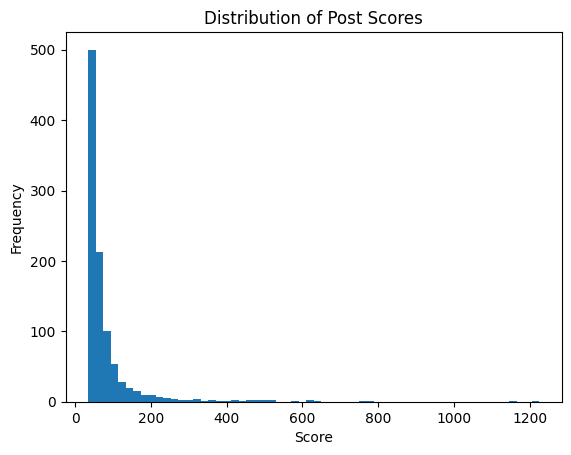

In [15]:
so_df['score'].plot.hist(bins=60)
plt.title('Distribution of Post Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

We can see a roughly positive relationship between the score and number of comments.

Text(0.5, 1.0, 'Correlation between the number of comments and Post Scores')

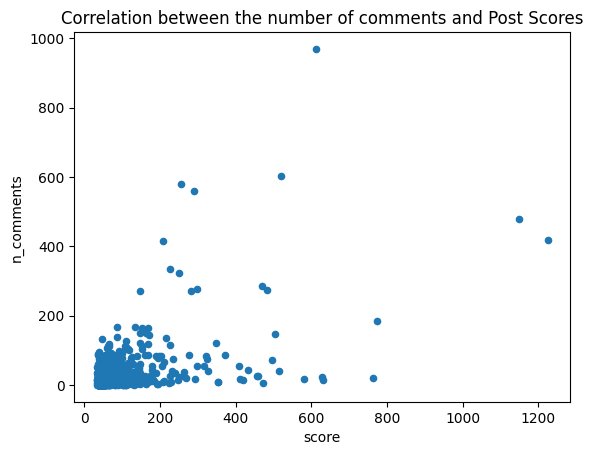

In [26]:
so_df.plot.scatter(x='score', y='n_comments')
plt.title('Correlation between the number of comments and Post Scores')

We also plotted a scatter plot for the number of words in the posts’ texts and the scores. The correlation is almost negligible but we do notice a negative trend, in that some of the posts with the most word count has some of the lowest scores, and some of the posts with the lowest word count has some of the highest scores.

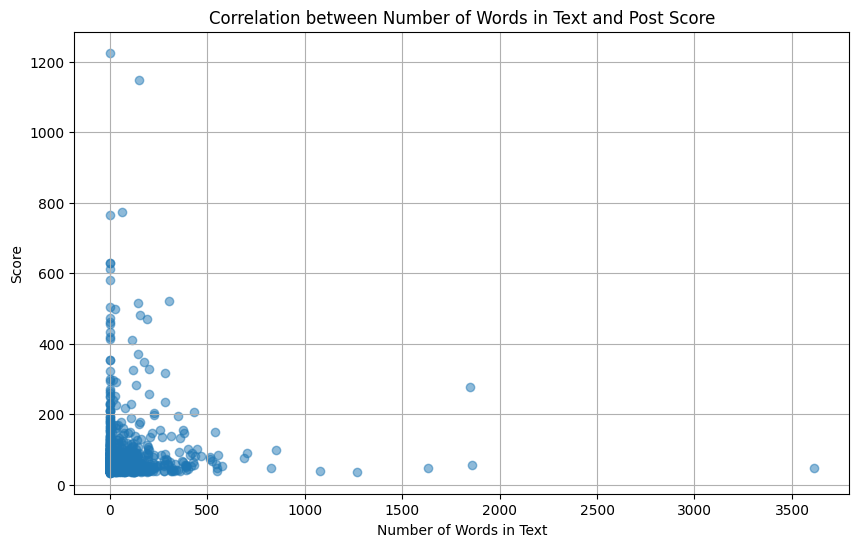

In [17]:
so_df['word_count'] = so_df['text'].apply(lambda x: len(str(x).split()))

# Step 2: Create a scatter plot showing the correlation between word count and score
plt.figure(figsize=(10, 6))
plt.scatter(so_df['word_count'], so_df['score'], alpha=0.5)
plt.title('Correlation between Number of Words in Text and Post Score')
plt.xlabel('Number of Words in Text')
plt.ylabel('Score')
plt.grid(True)
plt.show()

Next, let's look at the frequency counts of users who post things. The user who poster most frequently in our dataset was "Lightfiend". The next bar that shows no username is associated with the posts who's user accounts are no longer active.

Text(0.5, 1.0, 'Most Active Users')

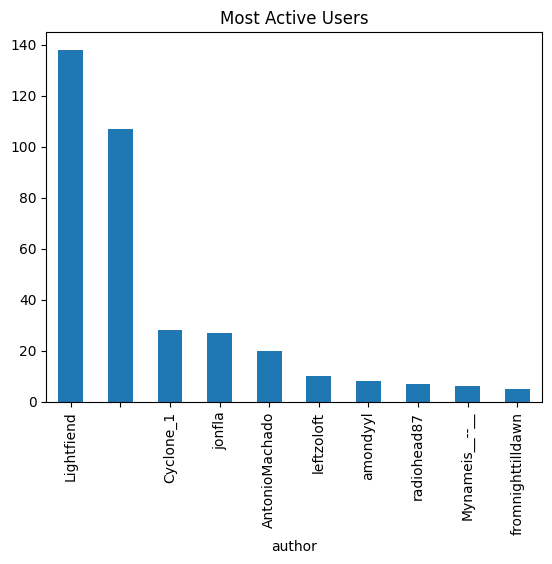

In [27]:
so_df['author'].value_counts()[:10].plot.bar()
plt.title('Most Active Users')


We filter the data to see what the top author is posted. We notice that the top user posts a lot.

In [19]:
so_df[so_df['author'] == 'Lightfiend']

,title,link,author,n_comments,score,text,comments,word_count
52,"As schools close due to the coronavirus, some ...",/r/sociology/comments/fjprdg/as_schools_close_...,Lightfiend,11,212,,I was talking to my coworker about this today ...,0
66,Millennials overtake Baby Boomers as America’s...,/r/sociology/comments/g9t2ax/millennials_overt...,Lightfiend,12,178,,"Guys, this is a sociology sub. Make comments ...",0
76,The U.S.’s imprisonment rate is at its lowest ...,/r/sociology/comments/gemshq/the_uss_imprisonm...,Lightfiend,4,164,,[deleted] It's because they're getting shot mo...,0
114,Most in US say growing racial and ethnic diver...,/r/sociology/comments/8rfb6e/most_in_us_say_gr...,Lightfiend,8,128,,I definitely agree with it. I'm indifferent ab...,0
132,"""How does cultural change happen? It's mostly ...",/r/sociology/comments/a8mbm8/how_does_cultural...,Lightfiend,10,113,,“A new scientific truth does not triumph by co...,0
...,...,...,...,...,...,...,...,...
923,Hive Mind: The Synergistic Effects of Being Ar...,/r/sociology/comments/4qgqx0/hive_mind_the_syn...,Lightfiend,3,41,,"Microcultures are normalising, yes. This remin...",0
971,A history of global living conditions in 5 cha...,/r/sociology/comments/5jqxwq/a_history_of_glob...,Lightfiend,3,37,,The poverty measure is a bit limited. It seems...,0
973,Social media causes some users to rethink thei...,/r/sociology/comments/5bo77p/social_media_caus...,Lightfiend,6,39,,This might just mean that people change their ...,0
975,Americans more tolerant of offensive speech th...,/r/sociology/comments/575obt/americans_more_to...,Lightfiend,1,39,,Well that's like saying fish swim better in wa...,0


Next, we check the word counts. We notice that many of the top words are common words "Stopwords" which doesn't tell us much.

In [20]:
fd = nltk.FreqDist(' '.join(so_df['title']).split())

fd.most_common(20)

[('the', 448),
 ('of', 423),
 ('to', 355),
 ('in', 322),
 ('a', 298),
 ('and', 280),
 ('are', 140),
 ('sociology', 126),
 ('is', 124),
 ('for', 119),
 ('you', 107),
 ('on', 104),
 ('that', 99),
 ('-', 99),
 ('I', 89),
 ('Sociology', 88),
 ('with', 85),
 ('as', 82),
 ('What', 77),
 ('about', 75)]

Text(0.5, 1.0, 'Most Frequently Used Words')

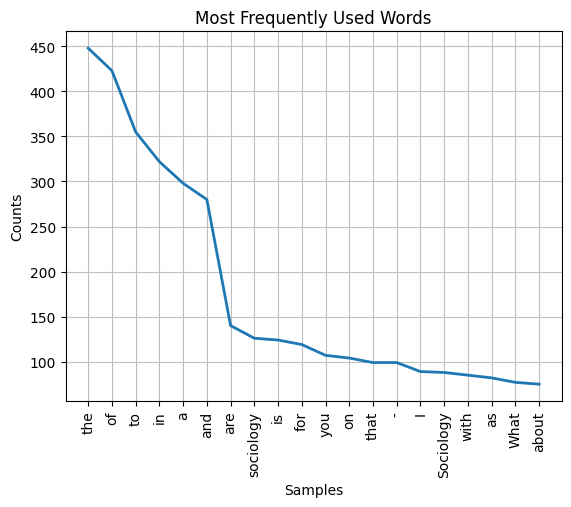

In [28]:
fd.plot(20)
plt.title('Most Frequently Used Words')

 We preprocess our data text analysis easier. We start by transforming all words to lowercase, then we remove the stopwords.

In [22]:
nltk.download('stopwords')
stops = stopwords.words('english')
stops = set(stops) | set(['sociology', 'sociological', 'sociology', 'sociologists', 'sociologist', 'sociology?'])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oussamaennaciri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
words = ' '.join(so_df['title']).lower().split()
cleaned_words = [w for w in words if w not in set(stops)]

In [24]:
cleaned_fd = nltk.FreqDist(cleaned_words)
cleaned_fd.most_common(20)

[('-', 99),
 ('social', 71),
 ('people', 68),
 ('u.s.', 46),
 ('americans', 46),
 ('say', 42),
 ('study', 40),
 ('new', 34),
 ('white', 26),
 ('women', 25),
 ('likely', 24),
 ('would', 22),
 ('books', 22),
 ('research', 22),
 ('years', 20),
 ('think', 20),
 ('get', 20),
 ('time', 19),
 ('degree', 19),
 ('millennials', 19)]

Text(0.5, 1.0, 'Most Frequently Used Words')

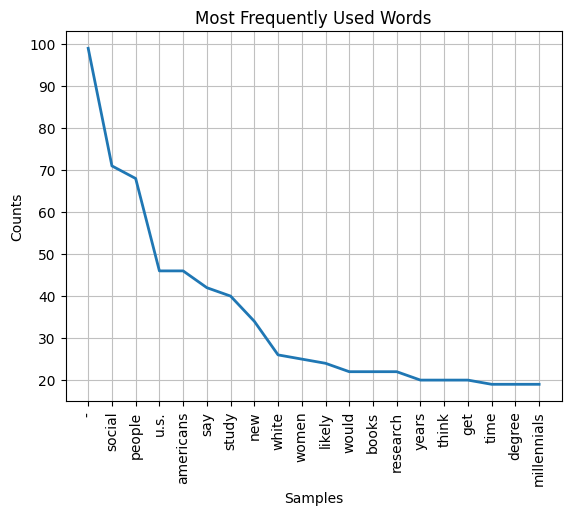

In [29]:
cleaned_fd.plot(20)
plt.title('Most Frequently Used Words')

# Analysis

For this week’s assignment, I collected data from the subreddit r/sociology.

I started by creating a Reddit API account and API keys, and importing the credentials along with the necessary libraries. I chose to sort the posts by “top” and the time frame “all” to get the highest-rated and therefore the most interesting posts. I saved the posts’ data, such as the title, text, author, permalink, comments, number of comments, and score, to an SQL database.

Later, I performed some basic EDA on the data to clearly see trends and patterns. I started by plotting a histogram of the post scores. I noticed that very few of the posts reached or surpassed the 1,000-upvote mark, with most of the posts receiving less than 200 upvotes. I also noticed that the data is asymmetrical, which can be attributed to the fact that I focused on the highest-performing 1,000 posts.

I then plotted a scatter plot for the score and number of comments. I noticed a slight positive relationship between the two variables.

I also plotted a scatter plot for the number of words in the posts’ texts and the scores. The correlation is almost negligible, but there is a negative trend in that some of the posts with the highest word count have some of the lowest scores, while some of the posts with the lowest word count have some of the highest scores.

Next, I looked at the frequency counts of users who post. The user who posted most frequently in our dataset was “Lightfiend.” I filtered the data to see what he had posted and noticed that he is very active.

Finally, I analyzed the data for the words most used. I preprocessed the data by transforming all words to lowercase and removing the stopwords. I received the following list of words that are relevant to the sociology field of study:

[('-', 99),
 ('social', 71),
 ('people', 68),
 ('u.s.', 46),
 ('americans', 46),
 ('say', 42),
 ('study', 40),
 ('new', 34),
 ('white', 26),
 ('women', 25),
 ('likely', 24),
 ('would', 22),
 ('books', 22),
 ('research', 22),
 ('years', 20),
 ('think', 20),
 ('get', 20),
 ('time', 19),
 ('degree', 19),
 ('millennials', 19)]
